# PD Model

In this PD model, we follow a structured approach to estimate the Probability of Default (PD) using logistic regression and other statistical techniques. Below is a detailed explanation of each step involved in this process:

#### 1. Data Preparation
- **Pre-processed Test and Target Data**: 
  - We start with pre-processed datasets for training (train dataset) and testing (test dataset). The target data (dependent variable) indicates whether a borrower has defaulted or not.

#### 2. Model Training
- **Logistic Regression**:
  - Logistic regression is applied to the train dataset to model the relationship between the independent variables (features) and the probability of default.
  
- **Statistical Significance**:
  - We study the p-values of the variables to determine which ones are statistically significant. Variables with p-values below a certain threshold (e.g., 0.05) are considered significant and included in the final model.

#### 3. Feature Selection and Model Testing
- **Feature Selection**:
  - Based on the p-values, we select the significant features and use them to build the final logistic regression model.
  
- **Model Evaluation**:
  - To evaluate the model's performance, we use metrics such as confusion matrix, AUROC (Area Under Receiver Operating Characteristic curve), Gini index, and KS (Kolmogorov-Smirnov) score.
  
  - **Confusion Matrix**:
    - This matrix shows the true positives, true negatives, false positives, and false negatives, helping us understand the model's accuracy.
    
  - **AUROC Score**:
    - The AUROC score measures the model's ability to distinguish between default and non-default cases. A higher AUROC indicates better model performance.
    
  - **Gini Index**:
    - The Gini index is derived from the AUROC and provides a measure of model discriminatory power.
    
  - **KS Score**:
    - The KS score measures the maximum difference between the cumulative distributions of the default and non-default cases, indicating the model's effectiveness in distinguishing between the two groups.

#### 4. PD Calculation and Scorecard Creation
- **PD Calculation**:
  - Using the final logistic regression model, we calculate the PD for individual accounts.
  
- **Scorecard Creation**:
  - A scorecard is created to assign a credit score to each account based on the calculated PD. This scorecard helps in translating the model outputs into a more interpretable format for credit risk assessment.

- **Credit Score Range**:
  - We set the credit score range from 300 to 850. This range is chosen to align with common credit scoring systems, making it easier to understand and compare.

#### 5. Cutoffs and PD Records
- **Setting Cutoffs**:
  - We define cutoffs for different PD levels, such as 10% and 5%. These cutoffs help in categorizing accounts based on their risk levels.
  
- **Reviewing Records**:
  - Records are reviewed to identify accounts with PD at or above these cutoffs, helping in risk segmentation and targeted interventions.

#### 6. Saving Model and Data
- **Saving Scorecard Data**:
  - The scorecard data is saved as a CSV file for further analysis and reporting.
  
- **Model Preservation**:
  - The trained logistic regression model is saved using the `pickle` module. This allows for the model to be reused for future calculations, such as estimating the Expected Loss (EL).

#### 7. Future Use
- **Expected Loss Calculation**:
  - The saved model will be used to calculate the EL, which combines the PD with Loss Given Default (LGD) and Exposure at Default (EAD) to estimate potential losses.

### Conclusion

This comprehensive approach ensures that the PD model is robust, interpretable, and useful for ongoing credit risk management. By carefully selecting significant features, evaluating model performance with various metrics, and translating the results into a practical scorecard, we can effectively estimate and manage the probability of default. Saving the model and scorecard data facilitates future analyses and ensures continuity in risk management practices.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv',index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv',index_col=0)

### Explore Data 

In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : <4,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85
8321,867616,1081228,7800,7800,7800.00000,36 months,15.99,274.19,D,D2,...,0,0,1,0,0,0,0,0,0,0
21102,647751,828706,8000,8000,7500.00000,36 months,9.25,255.33,B,B2,...,0,0,1,0,0,0,0,0,0,0
23008,619833,794435,25000,17425,16710.15996,36 months,9.99,562.18,B,B4,...,0,0,1,0,0,0,0,0,0,0
15102,754302,954015,7100,7100,7100.00000,36 months,9.99,229.07,B,B1,...,0,0,1,0,0,0,0,0,0,0
12607,795194,999909,20375,20375,20350.00000,60 months,16.49,500.81,D,D3,...,0,0,1,0,0,0,0,0,0,0


In [4]:
loan_data_inputs_train.shape

(31773, 289)

In [5]:
loan_data_targets_train.shape

(31773, 1)

In [6]:
loan_data_inputs_test.shape

(7944, 289)

In [7]:
loan_data_targets_test.shape

(7944, 1)

### Selecting Features

In [8]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade : A',
'grade : B',
'grade : C',
'grade : D',
'grade : E',
'grade : F',
'grade : G',
'home_ownership : OWN_OTHER_NONE',
'home_ownership : MORTGAGE',
'home_ownership : RENT',
'addr_state : NE_SD_AK_NV_NM_FL_ND',
'addr_state : ID_TN_HI_MD_WA_NH',
'addr_state : CA',
'addr_state : UT_GA_NJ',
'addr_state : OR_KY_NC_SC_MI',
'addr_state : MO_OK_VT_MT_MN',
'addr_state : NY',
'addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME',
'purpose : small_business',
'purpose : renewableEnergy_educational_house',
'purpose : other',
'purpose : debt_consolidation',
'purpose : medical_moving',
'purpose : homeimprovement_vacation_car',
'purpose : wedding_majorpurchase',
'purpose : credit_card',
'verification_status : Verified_SourceVerified',
'verification_status : Not Verified',
'initial_list_status : f',
'term_int : 36',
'term_int : 60',
'emp_length_int : 0',
'emp_length_int : 1',
'emp_length_int : 2-4',
'emp_length_int : 5-7',
'emp_length_int : 8-9',
'emp_length_int : >10',
'mnths_since_issue_d : <149',
'mnths_since_issue_d : 149-154',
'mnths_since_issue_d : 154-160',
'mnths_since_issue_d : 160-167',
'mnths_since_issue_d : 167-175',
'mnths_since_issue_d : 175-183',
'mnths_since_issue_d : >183',
'mnths_since_earliest_cr_line_factor : < 194',
'mnths_since_earliest_cr_line_factor : 194-213',
'mnths_since_earliest_cr_line_factor : 213-270',
'mnths_since_earliest_cr_line_factor : 270-366',
'mnths_since_earliest_cr_line_factor : 366-433',
'mnths_since_earliest_cr_line_factor : 433-490',
'mnths_since_earliest_cr_line_factor : > 490',
'delinq_2yrs_factor : 0',
'delinq_2yrs_factor : 1',
'delinq_2yrs_factor : 2-4',
'delinq_2yrs_factor : >=5',
'inq_last_6mths_factor : 0',
'inq_last_6mths_factor : 1-2',
'inq_last_6mths_factor : 3',
'inq_last_6mths_factor : >4',
'open_acc_factor : 0-4',
'open_acc_factor : 5-11',
'open_acc_factor : 12-15',
'open_acc_factor : 16-18',
'open_acc_factor : 16-20',
'open_acc_factor : >20',
'pub_rec_factor : 0',
'pub_rec_factor : 1',
'pub_rec_factor : >=2',
'total_acc_factor : 0-3',
'total_acc_factor : 4-8',
'total_acc_factor : 9-27',
'total_acc_factor : 28-39',
'total_acc_factor : 40-49',
'total_acc_factor : >=50',
'int_rate_factor : >6.179',
'int_rate_factor : 6.179-6.559',
'int_rate_factor : 6.559-8.077',
'int_rate_factor : 8.077-11.494',
'int_rate_factor : 11.494-16.049',
'int_rate_factor : 16.049-18.706',
'int_rate_factor : >18.706',
'annual_inc_factor : < 20K',
'annual_inc_factor : 20K-30K',
'annual_inc_factor : 30K-40K',
'annual_inc_factor : 40K-50K',
'annual_inc_factor : 50K-60K',
'annual_inc_factor : 60K-70K',
'annual_inc_factor : 70K-80K',
'annual_inc_factor : 80K-90K',
'annual_inc_factor : 90K-100K',
'annual_inc_factor : 100K-120K',
'annual_inc_factor : 120K-180K',
'annual_inc_factor : > 180K',
'dti_factor : < 1',
'dti_factor : 1-5',
'dti_factor : 5-7',
'dti_factor : 7-14',
'dti_factor : 14-16',
'dti_factor : 16-20',
'dti_factor : 20-24',
'dti_factor : 24-25',
'dti_factor : > 25',
'mths_since_last_delinq_factor : Missing',
'mths_since_last_delinq_factor : < 2',
'mths_since_last_delinq_factor : 3-19',
'mths_since_last_delinq_factor : 19-38',
'mths_since_last_delinq_factor : 38-52',
'mths_since_last_delinq_factor : 52-79',
'mths_since_last_delinq_factor : > 79',
'mths_since_last_record_factor : Missing',
'mths_since_last_record_factor : <4',
'mths_since_last_record_factor : 4-33',
'mths_since_last_record_factor : 33-37',
'mths_since_last_record_factor : 33-68',
'mths_since_last_record_factor : 68-85',
'mths_since_last_record_factor : 75-85',
'mths_since_last_record_factor : >85'
]]

Selecting reference categories as for **k** dummies only **k-1** dummy variables are needed.

In [9]:
ref_categories = [
'grade : G',
'home_ownership : OWN_OTHER_NONE',
'addr_state : NE_SD_AK_NV_NM_FL_ND',
'purpose : small_business',
'verification_status : Verified_SourceVerified',
'initial_list_status : f',
'term_int : 60',
'emp_length_int : 1',
'mnths_since_issue_d : <149',
'mnths_since_earliest_cr_line_factor : < 194',
'delinq_2yrs_factor : >=5',
'inq_last_6mths_factor : >4',
'open_acc_factor : 0-4',
'pub_rec_factor : >=2',
'total_acc_factor : 0-3',
'int_rate_factor : >18.706',
'annual_inc_factor : < 20K',
'dti_factor : > 25',
'mths_since_last_delinq_factor : < 2',
'mths_since_last_record_factor : <4'

]

In [10]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,home_ownership : MORTGAGE,home_ownership : RENT,addr_state : ID_TN_HI_MD_WA_NH,addr_state : CA,...,mths_since_last_delinq_factor : 38-52,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85
8321,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21102,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
23008,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
15102,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12607,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
inputs_train.dtypes

grade : A                                int64
grade : B                                int64
grade : C                                int64
grade : D                                int64
grade : E                                int64
                                         ...  
mths_since_last_record_factor : 33-37    int64
mths_since_last_record_factor : 33-68    int64
mths_since_last_record_factor : 68-85    int64
mths_since_last_record_factor : 75-85    int64
mths_since_last_record_factor : >85      int64
Length: 97, dtype: object

# PD Model Estimation

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()

In [14]:
pd.options.display.max_rows = None

In [15]:
reg.fit(inputs_train,loan_data_targets_train)

LogisticRegression()

In [16]:
reg.intercept_

array([-0.59981876])

In [17]:
reg.coef_

array([[ 1.13208816e+00,  7.52866609e-01,  5.34669450e-01,
         2.73183484e-01,  2.11680400e-01,  2.48269888e-03,
        -6.45212177e-02,  7.65712918e-04, -1.29922731e-01,
        -2.44588014e-01, -1.25693371e-01,  6.80092301e-02,
         3.62136875e-03,  4.31328280e-02,  2.31431053e-01,
         3.81388365e-01,  5.21853522e-01,  7.34749841e-01,
         5.27280758e-01,  8.03865416e-01,  9.35823927e-01,
         9.65102287e-01,  4.92149242e-02,  0.00000000e+00,
        -4.97708447e-01,  3.82682078e-02, -2.53118352e-02,
         2.55435756e-02,  1.37357915e-01,  9.45039457e-02,
         1.15252980e-01,  1.26806979e-01,  2.78472493e-01,
         3.80247264e-01,  3.13518847e-02, -8.00228504e-02,
        -6.87048163e-02, -3.08298190e-01, -3.07505409e-01,
        -2.70762424e-01, -3.00154778e-01, -1.92497754e-01,
        -2.31892256e-01, -3.33070246e-01,  5.61627804e-01,
         3.75191725e-01,  1.13111906e-01, -9.53858123e-02,
        -1.14458478e-01,  2.61440343e-01, -2.13206938e-0

### Creating summary table for coefficients 

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature name,Coefficients
0,Intercept,-0.599819
1,grade : A,1.132088
2,grade : B,0.752867
3,grade : C,0.534669
4,grade : D,0.273183


## Building a Logistic Model with P-values

#### GLM Stats Model for P-values

In the context of statistical analysis, we often use the statsmodels library to obtain p-values, as these cannot be directly obtained from sklearn. For instance, when working with Logistic Regression, which is a type of Generalized Linear Model (GLM), statsmodels is particularly useful for providing detailed statistical metrics, including p-values.

In [20]:
import statsmodels.api as sm

X_train = sm.add_constant(inputs_train)
y_train = loan_data_targets_train
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = glm_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               good_bad   No. Observations:                31773
Model:                            GLM   Df Residuals:                    31678
Model Family:                Binomial   Df Model:                           94
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11985.
Date:                Thu, 06 Jun 2024   Deviance:                       23970.
Time:                        21:08:55   Pearson chi2:                 3.15e+04
No. Iterations:                   100   Pseudo R-squ. (CS):            0.06307
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7927      0.647     -1.226      0.220      -2.060       0.474
grade : A                                         1.3238      0.197      6.711      0.000       0.937       1.710
grade : B                                         0.9346      0.176      5.302      0.000       0.589       1.280
grade : C                                         0.7041      0.170      4.130      0.000       0.370       1.038
grade : D                                         0.4294      0.162      2.655      0.008       0.112       0.746
grade : E                                         0.3436      0.153      2.241      0.025       0.043       0.644
grade : F                                         0.1226      0.160      0.768      0.442      -0.190       0.435
home_ownership : MORTGAGE                        -0.0714      0.066     -1.078      0.281      -0.201       0.058
home_ownership : RENT                            -0.0039      0.064     -0.061      0.951      -0.130       0.122
addr_state : ID_TN_HI_MD_WA_NH                   -0.1321      0.073     -1.807      0.071      -0.275       0.011
addr_state : CA                                  -0.2460      0.048     -5.160      0.000      -0.339      -0.153
addr_state : UT_GA_NJ                            -0.1247      0.062     -2.021      0.043      -0.246      -0.004
addr_state : OR_KY_NC_SC_MI                       0.0712      0.069      1.024      0.306      -0.065       0.207
addr_state : MO_OK_VT_MT_MN                       0.0040      0.084      0.048      0.962      -0.161       0.169
addr_state : NY                                   0.0395      0.064      0.622      0.534      -0.085       0.164
addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME        0.2310      0.062      3.723      0.000       0.109       0.353
purpose : renewableEnergy_educational_house       0.3850      0.123      3.121      0.002       0.143       0.627
purpose : other                                   0.5294      0.081      6.538      0.000       0.371       0.688
purpose : debt_consolidation                      0.7435      0.068     10.938      0.000       0.610       0.877
purpose : medical_moving                          0.5265      0.110      4.799      0.000       0.311       0.741
purpose : homeimprovement_vacation_car            0.8138      0.082      9.916      0.000       0.653       0.975
purpose : wedding_majorpurchase                   0.9456      0.093     10.132      0.000       0.763       1.128
purpose : credit_card                             0.9745      0.082     11.826      0.000       0.813       1.136
verification_status : Not Verified                0.0499      0.039      1.296      0.195      -0.026       0.125
term_

#### Creating summary table with p-values and coefficients

In [21]:
results_table = result.summary2().tables[1]
p_values = result.pvalues
summary_table2 = pd.DataFrame({'p_values': p_values})
summary_table2.reset_index(inplace=True)
summary_table2.rename(columns={'index': 'Feature name'}, inplace=True)
summary_table3 = pd.merge(summary_table, summary_table2, on='Feature name')
summary_table3.index = summary_table3.index + 1
summary_table3.loc[0] = ['Intercept',reg.intercept_[0], 2.201602e-01]
summary_table3 = summary_table3.sort_index()

In [22]:
summary_table = summary_table3
summary_table.head()

,Feature name,Coefficients,p_values
0,Intercept,-0.599819,2.201602e-01
1,grade : A,1.132088,1.938481e-11
2,grade : B,0.752867,1.142573e-07
3,grade : C,0.534669,3.622003e-05
4,grade : D,0.273183,7.936666e-03


From this we can observe that the following attributes are statistically significant : 
- `grade`
- `purpose`
- `mnths_since_issue_d`
- `inq_last_6mths_factor`
- `int_rate_factor`
- `annual_inc_factor`

# PD Model Validation

### Out-of-sample validation (test)

#### Selecting features for testing

In [23]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade : A',
'grade : B',
'grade : C',
'grade : D',
'grade : E',
'grade : F',
'grade : G',
'home_ownership : OWN_OTHER_NONE',
'home_ownership : MORTGAGE',
'home_ownership : RENT',
'addr_state : NE_SD_AK_NV_NM_FL_ND',
'addr_state : ID_TN_HI_MD_WA_NH',
'addr_state : CA',
'addr_state : UT_GA_NJ',
'addr_state : OR_KY_NC_SC_MI',
'addr_state : MO_OK_VT_MT_MN',
'addr_state : NY',
'addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME',
'purpose : small_business',
'purpose : renewableEnergy_educational_house',
'purpose : other',
'purpose : debt_consolidation',
'purpose : medical_moving',
'purpose : homeimprovement_vacation_car',
'purpose : wedding_majorpurchase',
'purpose : credit_card',
'verification_status : Verified_SourceVerified',
'verification_status : Not Verified',
'initial_list_status : f',
'term_int : 36',
'term_int : 60',
'emp_length_int : 0',
'emp_length_int : 1',
'emp_length_int : 2-4',
'emp_length_int : 5-7',
'emp_length_int : 8-9',
'emp_length_int : >10',
'mnths_since_issue_d : <149',
'mnths_since_issue_d : 149-154',
'mnths_since_issue_d : 154-160',
'mnths_since_issue_d : 160-167',
'mnths_since_issue_d : 167-175',
'mnths_since_issue_d : 175-183',
'mnths_since_issue_d : >183',
'mnths_since_earliest_cr_line_factor : < 194',
'mnths_since_earliest_cr_line_factor : 194-213',
'mnths_since_earliest_cr_line_factor : 213-270',
'mnths_since_earliest_cr_line_factor : 270-366',
'mnths_since_earliest_cr_line_factor : 366-433',
'mnths_since_earliest_cr_line_factor : 433-490',
'mnths_since_earliest_cr_line_factor : > 490',
'delinq_2yrs_factor : 0',
'delinq_2yrs_factor : 1',
'delinq_2yrs_factor : 2-4',
'delinq_2yrs_factor : >=5',
'inq_last_6mths_factor : 0',
'inq_last_6mths_factor : 1-2',
'inq_last_6mths_factor : 3',
'inq_last_6mths_factor : >4',
'open_acc_factor : 0-4',
'open_acc_factor : 5-11',
'open_acc_factor : 12-15',
'open_acc_factor : 16-18',
'open_acc_factor : 16-20',
'open_acc_factor : >20',
'pub_rec_factor : 0',
'pub_rec_factor : 1',
'pub_rec_factor : >=2',
'total_acc_factor : 0-3',
'total_acc_factor : 4-8',
'total_acc_factor : 9-27',
'total_acc_factor : 28-39',
'total_acc_factor : 40-49',
'total_acc_factor : >=50',
'int_rate_factor : >6.179',
'int_rate_factor : 6.179-6.559',
'int_rate_factor : 6.559-8.077',
'int_rate_factor : 8.077-11.494',
'int_rate_factor : 11.494-16.049',
'int_rate_factor : 16.049-18.706',
'int_rate_factor : >18.706',
'annual_inc_factor : < 20K',
'annual_inc_factor : 20K-30K',
'annual_inc_factor : 30K-40K',
'annual_inc_factor : 40K-50K',
'annual_inc_factor : 50K-60K',
'annual_inc_factor : 60K-70K',
'annual_inc_factor : 70K-80K',
'annual_inc_factor : 80K-90K',
'annual_inc_factor : 90K-100K',
'annual_inc_factor : 100K-120K',
'annual_inc_factor : 120K-180K',
'annual_inc_factor : > 180K',
'dti_factor : < 1',
'dti_factor : 1-5',
'dti_factor : 5-7',
'dti_factor : 7-14',
'dti_factor : 14-16',
'dti_factor : 16-20',
'dti_factor : 20-24',
'dti_factor : 24-25',
'dti_factor : > 25',
'mths_since_last_delinq_factor : Missing',
'mths_since_last_delinq_factor : < 2',
'mths_since_last_delinq_factor : 3-19',
'mths_since_last_delinq_factor : 19-38',
'mths_since_last_delinq_factor : 38-52',
'mths_since_last_delinq_factor : 52-79',
'mths_since_last_delinq_factor : > 79',
'mths_since_last_record_factor : Missing',
'mths_since_last_record_factor : <4',
'mths_since_last_record_factor : 4-33',
'mths_since_last_record_factor : 33-37',
'mths_since_last_record_factor : 33-68',
'mths_since_last_record_factor : 68-85',
'mths_since_last_record_factor : 75-85',
'mths_since_last_record_factor : >85'
]]

In [24]:
ref_categories = [
'grade : G',
'home_ownership : OWN_OTHER_NONE',
'addr_state : NE_SD_AK_NV_NM_FL_ND',
'purpose : small_business',
'verification_status : Verified_SourceVerified',
'initial_list_status : f',
'term_int : 60',
'emp_length_int : 1',
'mnths_since_issue_d : <149',
'mnths_since_earliest_cr_line_factor : < 194',
'delinq_2yrs_factor : >=5',
'inq_last_6mths_factor : >4',
'open_acc_factor : 0-4',
'pub_rec_factor : >=2',
'total_acc_factor : 0-3',
'int_rate_factor : >18.706',
'annual_inc_factor : < 20K',
'dti_factor : > 25',
'mths_since_last_delinq_factor : < 2',
'mths_since_last_record_factor : <4'
]

In [25]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis=1)
inputs_test.head()

,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,home_ownership : MORTGAGE,home_ownership : RENT,addr_state : ID_TN_HI_MD_WA_NH,addr_state : CA,...,mths_since_last_delinq_factor : 38-52,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85
18340,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
8413,0,1,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
14612,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33544,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1829,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


#### Predicting Probability of default

In [26]:
y_hat_test = reg.predict(inputs_test)

In [27]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
y_hat_test_proba = reg.predict_proba(inputs_test)

In [29]:
y_hat_test_proba

array([[0.11284163, 0.88715837],
       [0.13640001, 0.86359999],
       [0.36974804, 0.63025196],
       ...,
       [0.0335616 , 0.9664384 ],
       [0.08298043, 0.91701957],
       [0.06846449, 0.93153551]])

In [30]:
y_hat_test_proba[:][: , 1]

array([0.88715837, 0.86359999, 0.63025196, ..., 0.9664384 , 0.91701957,
       0.93153551])

##### Storing only the probabilities

In [31]:
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [32]:
y_hat_test_proba

array([0.88715837, 0.86359999, 0.63025196, ..., 0.9664384 , 0.91701957,
       0.93153551])

##### Storing predicitions in df along with target label

In [33]:
loan_data_targets_test_temp = loan_data_targets_test

In [34]:
loan_data_targets_test_temp.reset_index(drop=True, inplace =True)

In [35]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)

In [36]:
df_actual_predicted_probs.shape

(7944, 2)

In [37]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [38]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [39]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
18340,1,0.887158
8413,1,0.863600
14612,0,0.630252
33544,1,0.791574
1829,1,0.908110


### Accuracy and Area under the curve

##### Setting default threshold 

tr = 0.5 gives false positives but high accuracy, and 0.9(more conservative) gives less accuracy but lesser flase positives.

In [40]:
tr = 0.5 
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr ,1 ,0)

#### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual target values with the predicted values produced by the model, providing a detailed breakdown of the performance in terms of true positives, true negatives, false positives, and false negatives. Here's a brief explanation of each term:

- **True Positives (TP)**: Correctly predicted positive cases (model predicts 1, and the actual value is 1).
- **True Negatives (TN)**: Correctly predicted negative cases (model predicts 0, and the actual value is 0).
- **False Positives (FP)**: Incorrectly predicted positive cases (model predicts 1, but the actual value is 0).
- **False Negatives (FN)**: Incorrectly predicted negative cases (model predicts 0, but the actual value is 1).

In [41]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,14,1080
1,19,6831


- **True Negatives (TN)**: 14
  - The model correctly predicted 0 for 14 instances where the actual value was also 0.

- **False Positives (FP)**: 1080
  - The model incorrectly predicted 1 for 1080 instances where the actual value was 0.

- **False Negatives (FN)**: 19
  - The model incorrectly predicted 0 for 19 instances where the actual value was 1.

- **True Positives (TP)**: 6831
  - The model correctly predicted 1 for 6831 instances where the actual value was also 1.

In [42]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted']) / df_actual_predicted_probs.shape[0] 

Predicted,0,1
Actual,,
0,0.001762,0.135952
1,0.002392,0.859894


#### Accuracy based on Confusion Matrix

**Performance Metrics**

From the confusion matrix, several key performance metrics can be derived:

1. **Accuracy**: The proportion of correct predictions (both true positives and true negatives) out of all predictions.
   <br>$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{14 + 6831}{14 + 1080 + 19 + 6831} \approx 0.865
   $

2. **Precision**: The proportion of positive predictions that are actually correct.
   <br>$
   \text{Precision} = \frac{TP}{TP + FP} = \frac{6831}{6831 + 1080} \approx 0.864
   $

3. **Recall (Sensitivity)**: The proportion of actual positive cases that are correctly predicted.
    <br>$
   \text{Recall} = \frac{TP}{TP + FN} = \frac{6831}{6831 + 19} \approx 0.997
   $

4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
    <br>$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \approx 0.926
   $

These metrics help in understanding different aspects of the model's performance, such as how well it can identify positive cases, how reliable its positive predictions are, and the overall accuracy.

In [43]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]  

0.8616565961732126

#### ROC Curve 

The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings. The key components includes:

- **True Positive Rate (TPR)**, also known as Recall or Sensitivity: The proportion of actual positives correctly identified by the model.
  <br>$
  \text{TPR} = \frac{TP}{TP + FN}
  $

- **False Positive Rate (FPR)**: The proportion of actual negatives incorrectly identified as positives by the model.
  <br>$
  \text{FPR} = \frac{FP}{FP + TN}
  $

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99908592, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.45985401e-04, 2.13138686e-02, ...,
        9.99708029e-01, 9.99708029e-01, 1.00000000e+00]),
 array([       inf, 0.99523252, 0.97790971, ..., 0.4071393 , 0.39193856,
        0.35335855]))

In [46]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

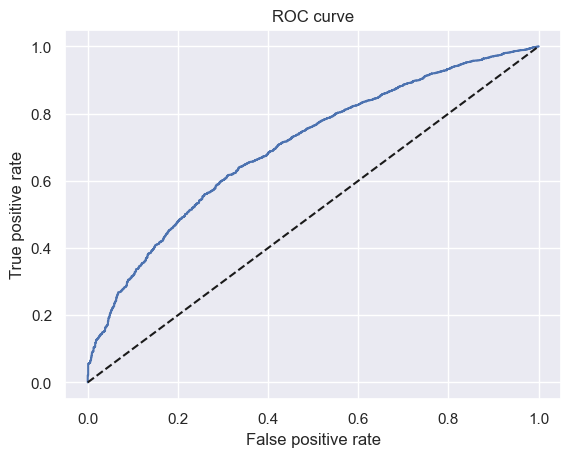

In [48]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

**AUROC Score:** The Area Under the ROC Curve (AUROC or simply AUC) is a single scalar value summarizing the overall performance of the classifier. It measures the area under the ROC curve and provides an aggregate measure of performance across all classification thresholds. The AUC value ranges from 0 to 1:

- **AUC = 1**: Perfect classifier
- **AUC = 0.5**: No discriminative ability, equivalent to random guessing
- **AUC < 0.5**: Worse than random guessing

**Interpretation:**

- **ROC Curve**: By visualizing the ROC curve, you can see the trade-off between the true positive rate and false positive rate. A curve closer to the top left corner indicates a better performing model.
- **AUROC Score**: Provides a single number summary. Higher values indicate better model performance, with values closer to 1 being desirable.

In [49]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7011574747461269

#### Gini Index

- **Definition**: In the context of classification model evaluation, the Gini Index is a metric derived from the AUROC score. It measures the inequality among values of a frequency distribution, specifically the distribution of predicted probabilities in binary classification.
- **Formula**: The Gini Index is calculated from the AUROC score as follows:
  <br>$
  \text{Gini Index} = 2 \times \text{AUROC} - 1
  $<br>

**Interpretation**

- **Range**: The Gini Index ranges from 0 to 1.
  - **0**: Indicates no discriminatory power, equivalent to an AUROC of 0.5 (random guessing).
  - **1**: Indicates perfect discriminatory power, equivalent to an AUROC of 1 (perfect classification).

**Usage**

- **Model Evaluation**: The Gini Index is used to evaluate the performance of binary classification models. Higher values of the Gini Index indicate better model performance in distinguishing between the positive and negative classes.
- **Relationship with AUROC**: Since the Gini Index is a transformation of the AUROC score, it essentially scales the AUROC from its original range of 0.5 to 1 into a range of 0 to 1.

In [50]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [51]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,18340,1,0.887158,1
1,8413,1,0.863600,1
2,14612,0,0.630252,1
3,33544,1,0.791574,1
4,1829,1,0.908110,1


In [52]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [53]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] /  (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [54]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,18340,1,0.887158,1,1,1,0,0.000126,0.000146,0.000000
1,8413,1,0.863600,1,2,2,0,0.000252,0.000292,0.000000
2,14612,0,0.630252,1,3,2,1,0.000378,0.000292,0.000914
3,33544,1,0.791574,1,4,3,1,0.000504,0.000438,0.000914
4,1829,1,0.908110,1,5,4,1,0.000629,0.000584,0.000914


Text(0.5, 1.0, 'Gini')

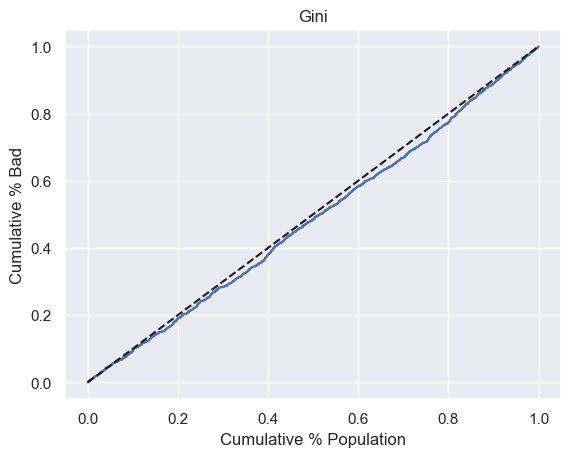

In [55]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'],linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [56]:
Gini = AUROC*2 -1
Gini

0.40231494949225377

#### Kolomogorov-Smirnov (KS)

The KS (Kolmogorov-Smirnov) statistic is a measure used to evaluate the performance of binary classification models, particularly in assessing how well the model distinguishes between two groups (e.g., positive and negative classes).

- **Definition**: The KS statistic measures the maximum difference between the cumulative distribution functions (CDFs) of the predicted probabilities for the positive and negative classes.
- **Calculation**:
  1. **CDF for Positives**: Calculate the cumulative distribution function of the predicted probabilities for the positive class.
  2. **CDF for Negatives**: Calculate the cumulative distribution function of the predicted probabilities for the negative class.
  3. **KS Statistic**: The KS statistic is the maximum vertical distance between these two CDFs.

**Interpretation**

- **Range**: The KS statistic ranges from 0 to 1.
  - **0**: Indicates no separation between the positive and negative class distributions (poor model).
  - **1**: Indicates perfect separation (ideal model).
- **Threshold Selection**: A higher KS value suggests better discriminatory power of the model. Commonly used in credit scoring and risk modeling, it helps in selecting an optimal cutoff threshold for classification.

**Usage**

- **Model Evaluation**: The KS statistic is used to assess the effectiveness of a binary classifier in distinguishing between two groups.
- **Performance Indicator**: Higher KS values indicate that the model has a stronger ability to distinguish between the positive and negative classes, making it a valuable metric for model validation.

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

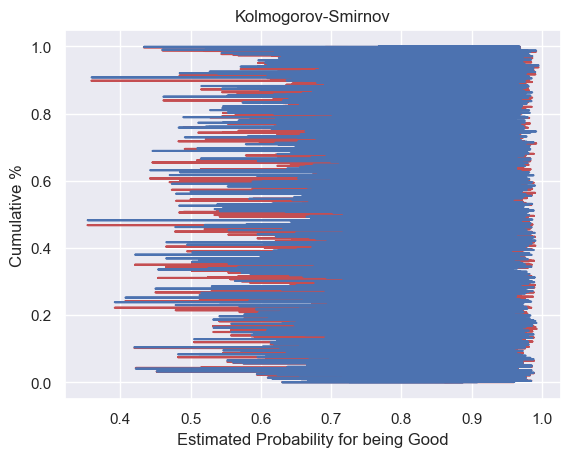

In [57]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'] ,color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'] ,color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [58]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.0026314735985268

# Applying the PD Model

### Calculating the PD of individual accounts

In [59]:
pd.options.display.max_columns = None

In [60]:
inputs_test_with_ref_cat.head()

,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,home_ownership : OWN_OTHER_NONE,home_ownership : MORTGAGE,home_ownership : RENT,addr_state : NE_SD_AK_NV_NM_FL_ND,addr_state : ID_TN_HI_MD_WA_NH,addr_state : CA,addr_state : UT_GA_NJ,addr_state : OR_KY_NC_SC_MI,addr_state : MO_OK_VT_MT_MN,addr_state : NY,addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME,purpose : small_business,purpose : renewableEnergy_educational_house,purpose : other,purpose : debt_consolidation,purpose : medical_moving,purpose : homeimprovement_vacation_car,purpose : wedding_majorpurchase,purpose : credit_card,verification_status : Verified_SourceVerified,verification_status : Not Verified,initial_list_status : f,term_int : 36,term_int : 60,emp_length_int : 0,emp_length_int : 1,emp_length_int : 2-4,emp_length_int : 5-7,emp_length_int : 8-9,emp_length_int : >10,mnths_since_issue_d : <149,mnths_since_issue_d : 149-154,mnths_since_issue_d : 154-160,mnths_since_issue_d : 160-167,mnths_since_issue_d : 167-175,mnths_since_issue_d : 175-183,mnths_since_issue_d : >183,mnths_since_earliest_cr_line_factor : < 194,mnths_since_earliest_cr_line_factor : 194-213,mnths_since_earliest_cr_line_factor : 213-270,mnths_since_earliest_cr_line_factor : 270-366,mnths_since_earliest_cr_line_factor : 366-433,mnths_since_earliest_cr_line_factor : 433-490,mnths_since_earliest_cr_line_factor : > 490,delinq_2yrs_factor : 0,delinq_2yrs_factor : 1,delinq_2yrs_factor : 2-4,delinq_2yrs_factor : >=5,inq_last_6mths_factor : 0,inq_last_6mths_factor : 1-2,inq_last_6mths_factor : 3,inq_last_6mths_factor : >4,open_acc_factor : 0-4,open_acc_factor : 5-11,open_acc_factor : 12-15,open_acc_factor : 16-18,open_acc_factor : 16-20,open_acc_factor : >20,pub_rec_factor : 0,pub_rec_factor : 1,pub_rec_factor : >=2,total_acc_factor : 0-3,total_acc_factor : 4-8,total_acc_factor : 9-27,total_acc_factor : 28-39,total_acc_factor : 40-49,total_acc_factor : >=50,int_rate_factor : >6.179,int_rate_factor : 6.179-6.559,int_rate_factor : 6.559-8.077,int_rate_factor : 8.077-11.494,int_rate_factor : 11.494-16.049,int_rate_factor : 16.049-18.706,int_rate_factor : >18.706,annual_inc_factor : < 20K,annual_inc_factor : 20K-30K,annual_inc_factor : 30K-40K,annual_inc_factor : 40K-50K,annual_inc_factor : 50K-60K,annual_inc_factor : 60K-70K,annual_inc_factor : 70K-80K,annual_inc_factor : 80K-90K,annual_inc_factor : 90K-100K,annual_inc_factor : 100K-120K,annual_inc_factor : 120K-180K,annual_inc_factor : > 180K,dti_factor : < 1,dti_factor : 1-5,dti_factor : 5-7,dti_factor : 7-14,dti_factor : 14-16,dti_factor : 16-20,dti_factor : 20-24,dti_factor : 24-25,dti_factor : > 25,mths_since_last_delinq_factor : Missing,mths_since_last_delinq_factor : < 2,mths_since_last_delinq_factor : 3-19,mths_since_last_delinq_factor : 19-38,mths_since_last_delinq_factor : 38-52,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : <4,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85
18340,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,True,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8413,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,True,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
14612,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33544,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,True,0,0,0,1,0,0

In [61]:
summary_table.head()

,Feature name,Coefficients,p_values
0,Intercept,-0.599819,2.201602e-01
1,grade : A,1.132088,1.938481e-11
2,grade : B,0.752867,1.142573e-07
3,grade : C,0.534669,3.622003e-05
4,grade : D,0.273183,7.936666e-03


In [62]:
y_hat_test_proba

array([0.88715837, 0.86359999, 0.63025196, ..., 0.9664384 , 0.91701957,
       0.93153551])

### Creating a Scorecard

In [63]:
ref_categories

['grade : G',
 'home_ownership : OWN_OTHER_NONE',
 'addr_state : NE_SD_AK_NV_NM_FL_ND',
 'purpose : small_business',
 'verification_status : Verified_SourceVerified',
 'initial_list_status : f',
 'term_int : 60',
 'emp_length_int : 1',
 'mnths_since_issue_d : <149',
 'mnths_since_earliest_cr_line_factor : < 194',
 'delinq_2yrs_factor : >=5',
 'inq_last_6mths_factor : >4',
 'open_acc_factor : 0-4',
 'pub_rec_factor : >=2',
 'total_acc_factor : 0-3',
 'int_rate_factor : >18.706',
 'annual_inc_factor : < 20K',
 'dti_factor : > 25',
 'mths_since_last_delinq_factor : < 2',
 'mths_since_last_record_factor : <4']

In [64]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0 
df_ref_categories['p_values'] = np.nan
df_ref_categories.head()

,Feature name,Coefficients,p_values
0,grade : G,0,NaN
1,home_ownership : OWN_OTHER_NONE,0,NaN
2,addr_state : NE_SD_AK_NV_NM_FL_ND,0,NaN
3,purpose : small_business,0,NaN
4,verification_status : Verified_SourceVerified,0,NaN


In [65]:
df_scorecard = pd.concat([summary_table,df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard.head()

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.599819,2.201602e-01
1,1,grade : A,1.132088,1.938481e-11
2,2,grade : B,0.752867,1.142573e-07
3,3,grade : C,0.534669,3.622003e-05
4,4,grade : D,0.273183,7.936666e-03


In [66]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(' : ').str[0]

##### Setting maximum and minimum score for scorecard

In [67]:
min_score = 300
max_score = 850

In [68]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                             -0.599819
addr_state                            -0.244588
annual_inc_factor                      0.000000
delinq_2yrs_factor                    -0.333070
dti_factor                            -0.040733
emp_length_int                        -0.497708
grade                                  0.000000
home_ownership                        -0.064521
initial_list_status                    0.000000
inq_last_6mths_factor                  0.000000
int_rate_factor                       -0.193397
mnths_since_earliest_cr_line_factor   -0.308298
mnths_since_issue_d                    0.000000
mths_since_last_delinq_factor         -0.490706
mths_since_last_record_factor         -0.412997
open_acc_factor                       -0.213207
pub_rec_factor                         0.000000
purpose                                0.000000
term_int                               0.000000
total_acc_factor                      -0.226626
verification_statu

In [69]:
min_sum_coeff = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coeff

-3.625671035717584

In [70]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                             -0.599819
addr_state                             0.231431
annual_inc_factor                      1.233590
delinq_2yrs_factor                     0.000000
dti_factor                             0.174898
emp_length_int                         0.137358
grade                                  1.132088
home_ownership                         0.000766
initial_list_status                    0.000000
inq_last_6mths_factor                  0.561628
int_rate_factor                        0.969021
mnths_since_earliest_cr_line_factor    0.000000
mnths_since_issue_d                    0.380247
mths_since_last_delinq_factor          0.172956
mths_since_last_record_factor          0.465800
open_acc_factor                        0.261440
pub_rec_factor                         0.000000
purpose                                0.965102
term_int                               0.000000
total_acc_factor                       0.086999
verification_statu

In [71]:
max_sum_coeff = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coeff

6.2227208090775985

In [72]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coeff - min_sum_coeff)
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.599819,2.201602e-01,Intercept,-33.497887
1,1,grade : A,1.132088,1.938481e-11,grade,63.223367
2,2,grade : B,0.752867,1.142573e-07,grade,42.045102
3,3,grade : C,0.534669,3.622003e-05,grade,29.859514
4,4,grade : D,0.273183,7.936666e-03,grade,15.256391


In [73]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coeff) / (max_sum_coeff - min_sum_coeff)) * (max_score-min_score) + min_score
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.599819,2.201602e-01,Intercept,468.983808
1,1,grade : A,1.132088,1.938481e-11,grade,63.223367
2,2,grade : B,0.752867,1.142573e-07,grade,42.045102
3,3,grade : C,0.534669,3.622003e-05,grade,29.859514
4,4,grade : D,0.273183,7.936666e-03,grade,15.256391


In [74]:
df_scorecard['Score  - Prelimiary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Prelimiary
0,0,Intercept,-0.599819,2.201602e-01,Intercept,468.983808,469.0
1,1,grade : A,1.132088,1.938481e-11,grade,63.223367,63.0
2,2,grade : B,0.752867,1.142573e-07,grade,42.045102,42.0
3,3,grade : C,0.534669,3.622003e-05,grade,29.859514,30.0
4,4,grade : D,0.273183,7.936666e-03,grade,15.256391,15.0


In [75]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score  - Prelimiary'].min().sum()
min_sum_score_prel

299.0

In [76]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score  - Prelimiary'].max().sum()
max_sum_score_prel

851.0

In [77]:
df_scorecard['Difference'] = df_scorecard['Score  - Prelimiary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Prelimiary,Difference
0,0,Intercept,-0.599819,2.201602e-01,Intercept,468.983808,469.0,0.016192
1,1,grade : A,1.132088,1.938481e-11,grade,63.223367,63.0,-0.223367
2,2,grade : B,0.752867,1.142573e-07,grade,42.045102,42.0,-0.045102
3,3,grade : C,0.534669,3.622003e-05,grade,29.859514,30.0,0.140486
4,4,grade : D,0.273183,7.936666e-03,grade,15.256391,15.0,-0.256391
5,5,grade : E,0.211680,2.505260e-02,grade,11.821648,12.0,0.178352
6,6,grade : F,0.002483,4.422104e-01,grade,0.138650,0.0,-0.138650
7,7,home_ownership : MORTGAGE,-0.064521,2.809159e-01,home_ownership,-3.603296,-4.0,-0.396704
8,8,home_ownership : RENT,0.000766,9.513983e-01,home_ownership,0.042763,0.0,-0.042763
9,9,addr_state : ID_TN_HI_MD_WA_NH,-0.129923,7.072180e-02,addr_state,-7.255753,-7.0,0.255753


In [78]:
df_scorecard['Score - Final'] = df_scorecard['Score  - Prelimiary']
df_scorecard['Score - Final'][36] = -5

In [79]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

299.0

In [80]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

851.0

### Calculating a Credit Score

In [81]:
inputs_test_with_ref_cat.head()

,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,home_ownership : OWN_OTHER_NONE,home_ownership : MORTGAGE,home_ownership : RENT,addr_state : NE_SD_AK_NV_NM_FL_ND,addr_state : ID_TN_HI_MD_WA_NH,addr_state : CA,addr_state : UT_GA_NJ,addr_state : OR_KY_NC_SC_MI,addr_state : MO_OK_VT_MT_MN,addr_state : NY,addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME,purpose : small_business,purpose : renewableEnergy_educational_house,purpose : other,purpose : debt_consolidation,purpose : medical_moving,purpose : homeimprovement_vacation_car,purpose : wedding_majorpurchase,purpose : credit_card,verification_status : Verified_SourceVerified,verification_status : Not Verified,initial_list_status : f,term_int : 36,term_int : 60,emp_length_int : 0,emp_length_int : 1,emp_length_int : 2-4,emp_length_int : 5-7,emp_length_int : 8-9,emp_length_int : >10,mnths_since_issue_d : <149,mnths_since_issue_d : 149-154,mnths_since_issue_d : 154-160,mnths_since_issue_d : 160-167,mnths_since_issue_d : 167-175,mnths_since_issue_d : 175-183,mnths_since_issue_d : >183,mnths_since_earliest_cr_line_factor : < 194,mnths_since_earliest_cr_line_factor : 194-213,mnths_since_earliest_cr_line_factor : 213-270,mnths_since_earliest_cr_line_factor : 270-366,mnths_since_earliest_cr_line_factor : 366-433,mnths_since_earliest_cr_line_factor : 433-490,mnths_since_earliest_cr_line_factor : > 490,delinq_2yrs_factor : 0,delinq_2yrs_factor : 1,delinq_2yrs_factor : 2-4,delinq_2yrs_factor : >=5,inq_last_6mths_factor : 0,inq_last_6mths_factor : 1-2,inq_last_6mths_factor : 3,inq_last_6mths_factor : >4,open_acc_factor : 0-4,open_acc_factor : 5-11,open_acc_factor : 12-15,open_acc_factor : 16-18,open_acc_factor : 16-20,open_acc_factor : >20,pub_rec_factor : 0,pub_rec_factor : 1,pub_rec_factor : >=2,total_acc_factor : 0-3,total_acc_factor : 4-8,total_acc_factor : 9-27,total_acc_factor : 28-39,total_acc_factor : 40-49,total_acc_factor : >=50,int_rate_factor : >6.179,int_rate_factor : 6.179-6.559,int_rate_factor : 6.559-8.077,int_rate_factor : 8.077-11.494,int_rate_factor : 11.494-16.049,int_rate_factor : 16.049-18.706,int_rate_factor : >18.706,annual_inc_factor : < 20K,annual_inc_factor : 20K-30K,annual_inc_factor : 30K-40K,annual_inc_factor : 40K-50K,annual_inc_factor : 50K-60K,annual_inc_factor : 60K-70K,annual_inc_factor : 70K-80K,annual_inc_factor : 80K-90K,annual_inc_factor : 90K-100K,annual_inc_factor : 100K-120K,annual_inc_factor : 120K-180K,annual_inc_factor : > 180K,dti_factor : < 1,dti_factor : 1-5,dti_factor : 5-7,dti_factor : 7-14,dti_factor : 14-16,dti_factor : 16-20,dti_factor : 20-24,dti_factor : 24-25,dti_factor : > 25,mths_since_last_delinq_factor : Missing,mths_since_last_delinq_factor : < 2,mths_since_last_delinq_factor : 3-19,mths_since_last_delinq_factor : 19-38,mths_since_last_delinq_factor : 38-52,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : <4,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85
18340,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,True,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8413,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,True,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
14612,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33544,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,True,0,0,0,1,0,0

In [82]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Prelimiary,Difference,Score - Final
0,0,Intercept,-0.599819,2.201602e-01,Intercept,468.983808,469.0,0.016192,469.0
1,1,grade : A,1.132088,1.938481e-11,grade,63.223367,63.0,-0.223367,63.0
2,2,grade : B,0.752867,1.142573e-07,grade,42.045102,42.0,-0.045102,42.0
3,3,grade : C,0.534669,3.622003e-05,grade,29.859514,30.0,0.140486,30.0
4,4,grade : D,0.273183,7.936666e-03,grade,15.256391,15.0,-0.256391,15.0


In [83]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [84]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept',1)

In [85]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,home_ownership : OWN_OTHER_NONE,home_ownership : MORTGAGE,home_ownership : RENT,addr_state : NE_SD_AK_NV_NM_FL_ND,addr_state : ID_TN_HI_MD_WA_NH,addr_state : CA,addr_state : UT_GA_NJ,addr_state : OR_KY_NC_SC_MI,addr_state : MO_OK_VT_MT_MN,addr_state : NY,addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME,purpose : small_business,purpose : renewableEnergy_educational_house,purpose : other,purpose : debt_consolidation,purpose : medical_moving,purpose : homeimprovement_vacation_car,purpose : wedding_majorpurchase,purpose : credit_card,verification_status : Verified_SourceVerified,verification_status : Not Verified,initial_list_status : f,term_int : 36,term_int : 60,emp_length_int : 0,emp_length_int : 1,emp_length_int : 2-4,emp_length_int : 5-7,emp_length_int : 8-9,emp_length_int : >10,mnths_since_issue_d : <149,mnths_since_issue_d : 149-154,mnths_since_issue_d : 154-160,mnths_since_issue_d : 160-167,mnths_since_issue_d : 167-175,mnths_since_issue_d : 175-183,mnths_since_issue_d : >183,mnths_since_earliest_cr_line_factor : < 194,mnths_since_earliest_cr_line_factor : 194-213,mnths_since_earliest_cr_line_factor : 213-270,mnths_since_earliest_cr_line_factor : 270-366,mnths_since_earliest_cr_line_factor : 366-433,mnths_since_earliest_cr_line_factor : 433-490,mnths_since_earliest_cr_line_factor : > 490,delinq_2yrs_factor : 0,delinq_2yrs_factor : 1,delinq_2yrs_factor : 2-4,delinq_2yrs_factor : >=5,inq_last_6mths_factor : 0,inq_last_6mths_factor : 1-2,inq_last_6mths_factor : 3,inq_last_6mths_factor : >4,open_acc_factor : 0-4,open_acc_factor : 5-11,open_acc_factor : 12-15,open_acc_factor : 16-18,open_acc_factor : 16-20,open_acc_factor : >20,pub_rec_factor : 0,pub_rec_factor : 1,pub_rec_factor : >=2,total_acc_factor : 0-3,total_acc_factor : 4-8,total_acc_factor : 9-27,total_acc_factor : 28-39,total_acc_factor : 40-49,total_acc_factor : >=50,int_rate_factor : >6.179,int_rate_factor : 6.179-6.559,int_rate_factor : 6.559-8.077,int_rate_factor : 8.077-11.494,int_rate_factor : 11.494-16.049,int_rate_factor : 16.049-18.706,int_rate_factor : >18.706,annual_inc_factor : < 20K,annual_inc_factor : 20K-30K,annual_inc_factor : 30K-40K,annual_inc_factor : 40K-50K,annual_inc_factor : 50K-60K,annual_inc_factor : 60K-70K,annual_inc_factor : 70K-80K,annual_inc_factor : 80K-90K,annual_inc_factor : 90K-100K,annual_inc_factor : 100K-120K,annual_inc_factor : 120K-180K,annual_inc_factor : > 180K,dti_factor : < 1,dti_factor : 1-5,dti_factor : 5-7,dti_factor : 7-14,dti_factor : 14-16,dti_factor : 16-20,dti_factor : 20-24,dti_factor : 24-25,dti_factor : > 25,mths_since_last_delinq_factor : Missing,mths_since_last_delinq_factor : < 2,mths_since_last_delinq_factor : 3-19,mths_since_last_delinq_factor : 19-38,mths_since_last_delinq_factor : 38-52,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : <4,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85
18340,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,True,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8413,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,True,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
14612,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33544,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [86]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [87]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,home_ownership : MORTGAGE,home_ownership : RENT,addr_state : ID_TN_HI_MD_WA_NH,addr_state : CA,addr_state : UT_GA_NJ,addr_state : OR_KY_NC_SC_MI,addr_state : MO_OK_VT_MT_MN,addr_state : NY,addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME,purpose : renewableEnergy_educational_house,purpose : other,purpose : debt_consolidation,purpose : medical_moving,purpose : homeimprovement_vacation_car,purpose : wedding_majorpurchase,purpose : credit_card,verification_status : Not Verified,term_int : 36,emp_length_int : 0,emp_length_int : 2-4,emp_length_int : 5-7,emp_length_int : 8-9,emp_length_int : >10,mnths_since_issue_d : 149-154,mnths_since_issue_d : 154-160,mnths_since_issue_d : 160-167,mnths_since_issue_d : 167-175,mnths_since_issue_d : 175-183,mnths_since_issue_d : >183,mnths_since_earliest_cr_line_factor : 194-213,mnths_since_earliest_cr_line_factor : 213-270,mnths_since_earliest_cr_line_factor : 270-366,mnths_since_earliest_cr_line_factor : 366-433,mnths_since_earliest_cr_line_factor : 433-490,mnths_since_earliest_cr_line_factor : > 490,delinq_2yrs_factor : 0,delinq_2yrs_factor : 1,delinq_2yrs_factor : 2-4,inq_last_6mths_factor : 0,inq_last_6mths_factor : 1-2,inq_last_6mths_factor : 3,open_acc_factor : 5-11,open_acc_factor : 12-15,open_acc_factor : 16-18,open_acc_factor : 16-20,open_acc_factor : >20,pub_rec_factor : 0,pub_rec_factor : 1,total_acc_factor : 4-8,total_acc_factor : 9-27,total_acc_factor : 28-39,total_acc_factor : 40-49,total_acc_factor : >=50,int_rate_factor : >6.179,int_rate_factor : 6.179-6.559,int_rate_factor : 6.559-8.077,int_rate_factor : 8.077-11.494,int_rate_factor : 11.494-16.049,int_rate_factor : 16.049-18.706,annual_inc_factor : 20K-30K,annual_inc_factor : 30K-40K,annual_inc_factor : 40K-50K,annual_inc_factor : 50K-60K,annual_inc_factor : 60K-70K,annual_inc_factor : 70K-80K,annual_inc_factor : 80K-90K,annual_inc_factor : 90K-100K,annual_inc_factor : 100K-120K,annual_inc_factor : 120K-180K,annual_inc_factor : > 180K,dti_factor : < 1,dti_factor : 1-5,dti_factor : 5-7,dti_factor : 7-14,dti_factor : 14-16,dti_factor : 16-20,dti_factor : 20-24,dti_factor : 24-25,mths_since_last_delinq_factor : Missing,mths_since_last_delinq_factor : 3-19,mths_since_last_delinq_factor : 19-38,mths_since_last_delinq_factor : 38-52,mths_since_last_delinq_factor : 52-79,mths_since_last_delinq_factor : > 79,mths_since_last_record_factor : Missing,mths_since_last_record_factor : 4-33,mths_since_last_record_factor : 33-37,mths_since_last_record_factor : 33-68,mths_since_last_record_factor : 68-85,mths_since_last_record_factor : 75-85,mths_since_last_record_factor : >85,grade : G,home_ownership : OWN_OTHER_NONE,addr_state : NE_SD_AK_NV_NM_FL_ND,purpose : small_business,verification_status : Verified_SourceVerified,initial_list_status : f,term_int : 60,emp_length_int : 1,mnths_since_issue_d : <149,mnths_since_earliest_cr_line_factor : < 194,delinq_2yrs_factor : >=5,inq_last_6mths_factor : >4,open_acc_factor : 0-4,pub_rec_factor : >=2,total_acc_factor : 0-3,int_rate_factor : >18.706,annual_inc_factor : < 20K,dti_factor : > 25,mths_since_last_delinq_factor : < 2,mths_since_last_record_factor : <4
18340,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,0,0,0,0,1,1,0,0,0,0,0,0,0,0
8413,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,0,0,0,0,1,1,0,0,0,0,0,0,0,0
14612,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,0,0,0,0,1,0,1,0,0,0,0,0,0,0
33544,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,

In [88]:
scorecard_scores = df_scorecard['Score - Final']

In [89]:
inputs_test_with_ref_cat_w_intercept.shape

(7944, 118)

In [90]:
scorecard_scores.shape

(118,)

In [91]:
scorecard_scores = scorecard_scores.values.reshape(118,1)

In [92]:
scorecard_scores.shape

(118, 1)

In [93]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [94]:
y_scores.head()


,0
18340,616.0
8413,604.0
14612,530.0
33544,576.0
1829,629.0


In [95]:
y_scores = pd.to_numeric(y_scores[0])

### From Credit Score to PD

![credittoPD](credittopd.png)

In [96]:
sum_coeff_from_score = pd.DataFrame()
sum_coeff_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coeff - min_sum_coeff) + min_sum_coeff

In [97]:
y_hat_proba_from_score = pd.DataFrame()
y_hat_proba_from_score = np.exp(sum_coeff_from_score) / (np.exp(sum_coeff_from_score) + 1)
y_hat_proba_from_score.head()

18340    0.884186
8413     0.860302
14612    0.620753
33544    0.788587
1829     0.905976
Name: 0, dtype: float64

In [98]:
y_hat_test_proba[0: 5]

array([0.88715837, 0.86359999, 0.63025196, 0.79157372, 0.90811042])

Difference between the two is there because we rounded them.

### Setting Cutoffs

- Pre-determines the total number of borrowers that will be approved and rejected.
- Impacts the qualities of loans.

![cutoffrate](cutoffrate.png)

In [99]:
tr = 0.5 
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr ,1 ,0)

In [100]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,14,1080
1,19,6831


In [101]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted']) / df_actual_predicted_probs.shape[0] 

Predicted,0,1
Actual,,
0,0.001762,0.135952
1,0.002392,0.859894


In [102]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'],colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]  

0.8616565961732126

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

In [104]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99908592, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.45985401e-04, 2.13138686e-02, ...,
        9.99708029e-01, 9.99708029e-01, 1.00000000e+00]),
 array([       inf, 0.99523252, 0.97790971, ..., 0.4071393 , 0.39193856,
        0.35335855]))

In [105]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

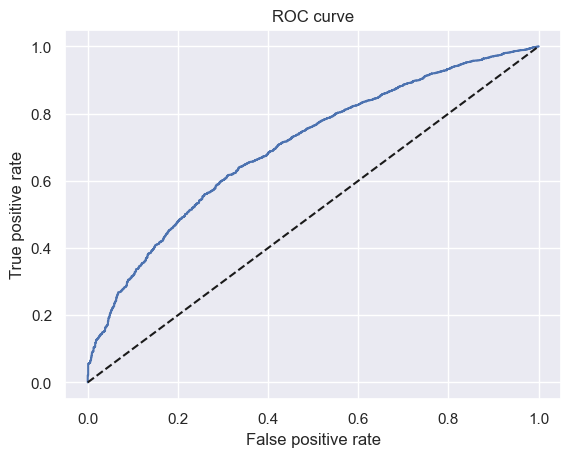

In [107]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [108]:
thresholds

array([       inf, 0.99523252, 0.97790971, ..., 0.4071393 , 0.39193856,
       0.35335855])

In [109]:
thresholds.shape

(1760,)

##### Creating df for thresholds, False Positive rates, True Positive rates

In [110]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)],axis=1)

In [111]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [112]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.995233,0.000000,0.000146
2,0.977910,0.000000,0.021314
3,0.977891,0.000914,0.021314
4,0.967453,0.000914,0.054161


In [113]:
df_cutoffs['thresholds'][0] = 1 - (1 / np.power(10,16))

In [114]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coeff) *((max_score - min_score) / (max_sum_coeff - min_sum_coeff)) + min_score).round()

In [115]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,1695.0
1,0.995233,0.000000,0.000146,801.0
2,0.977910,0.000000,0.021314,714.0
3,0.977891,0.000914,0.021314,714.0
4,0.967453,0.000914,0.054161,692.0


In [116]:
df_cutoffs['Score'][0] = max_score

In [117]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.995233,0.000000,0.000146,801.0
2,0.977910,0.000000,0.021314,714.0
3,0.977891,0.000914,0.021314,714.0
4,0.967453,0.000914,0.054161,692.0


In [118]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
1755,0.420822,0.998172,0.999562,485.0
1756,0.419845,0.999086,0.999562,484.0
1757,0.407139,0.999086,0.999708,481.0
1758,0.391939,1.000000,0.999708,478.0
1759,0.353359,1.000000,1.000000,469.0


In [119]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p , 1, 0).sum()

In [120]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [121]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,7944,0.000000,1.000000
1,0.995233,0.000000,0.000146,801.0,1,7943,0.000126,0.999874
2,0.977910,0.000000,0.021314,714.0,146,7798,0.018379,0.981621
3,0.977891,0.000914,0.021314,714.0,147,7797,0.018505,0.981495
4,0.967453,0.000914,0.054161,692.0,372,7572,0.046828,0.953172


In [122]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1755,0.420822,0.998172,0.999562,485.0,7939,5,0.999371,0.000629
1756,0.419845,0.999086,0.999562,484.0,7940,4,0.999496,0.000504
1757,0.407139,0.999086,0.999708,481.0,7941,3,0.999622,0.000378
1758,0.391939,1.000000,0.999708,478.0,7942,2,0.999748,0.000252
1759,0.353359,1.000000,1.000000,469.0,7944,0,1.000000,0.000000


#### PD with 10% Probability

We will accept 90% threshold, which can be seen for 344 records.

In [123]:
df_cutoffs.iloc[: 345,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,7944,0.000000,1.000000
1,0.995233,0.000000,0.000146,801.0,1,7943,0.000126,0.999874
2,0.977910,0.000000,0.021314,714.0,146,7798,0.018379,0.981621
3,0.977891,0.000914,0.021314,714.0,147,7797,0.018505,0.981495
4,0.967453,0.000914,0.054161,692.0,372,7572,0.046828,0.953172
5,0.967441,0.001828,0.054161,692.0,373,7571,0.046954,0.953046
6,0.966940,0.001828,0.056642,691.0,390,7554,0.049094,0.950906
7,0.966928,0.002742,0.056642,691.0,391,7553,0.049220,0.950780
8,0.966730,0.002742,0.057372,691.0,396,7548,0.049849,0.950151
9,0.966725,0.003656,0.057372,691.0,397,7547,0.049975,0.950025


#### PD with 5% Probability

We will accept 95% threshold, which can be seen for 61 records.

In [124]:
df_cutoffs.iloc[: 61,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,7944,0.000000,1.000000
1,0.995233,0.000000,0.000146,801.0,1,7943,0.000126,0.999874
2,0.977910,0.000000,0.021314,714.0,146,7798,0.018379,0.981621
3,0.977891,0.000914,0.021314,714.0,147,7797,0.018505,0.981495
4,0.967453,0.000914,0.054161,692.0,372,7572,0.046828,0.953172
5,0.967441,0.001828,0.054161,692.0,373,7571,0.046954,0.953046
6,0.966940,0.001828,0.056642,691.0,390,7554,0.049094,0.950906
7,0.966928,0.002742,0.056642,691.0,391,7553,0.049220,0.950780
8,0.966730,0.002742,0.057372,691.0,396,7548,0.049849,0.950151
9,0.966725,0.003656,0.057372,691.0,397,7547,0.049975,0.950025


In [125]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [126]:
df_scorecard.to_csv('df_scorecard.csv')

# Saving the Model

In [127]:
import pickle

In [128]:
pickle.dump(reg, open('pd_model.sav','wb'))